In [1]:
# Cosas varias de forma

%matplotlib inline
from IPython import embed
from IPython.display import display

# Carga cosas necesarias
from graficos import *
from loadUmbral import *
from DownloadFile import *

# Carga la configuracion
settings = {}
settings['FilterCodeVersion'] = 10 # 0 es sin filtro
settings['FilterLevelVersion'] = 0 # 0 es sin filtro
settings['FilterResourcesVersion'] = 0 # 0 es sin filtro
settings['ShowTimeline'] = True
settings['ShowPlotsPorLevel'] = True

In [4]:
DownloadFile ()

Starting download, please wait
Donload finish


In [5]:
touchs, sounds = load(settings)

recursos cargados del archivo


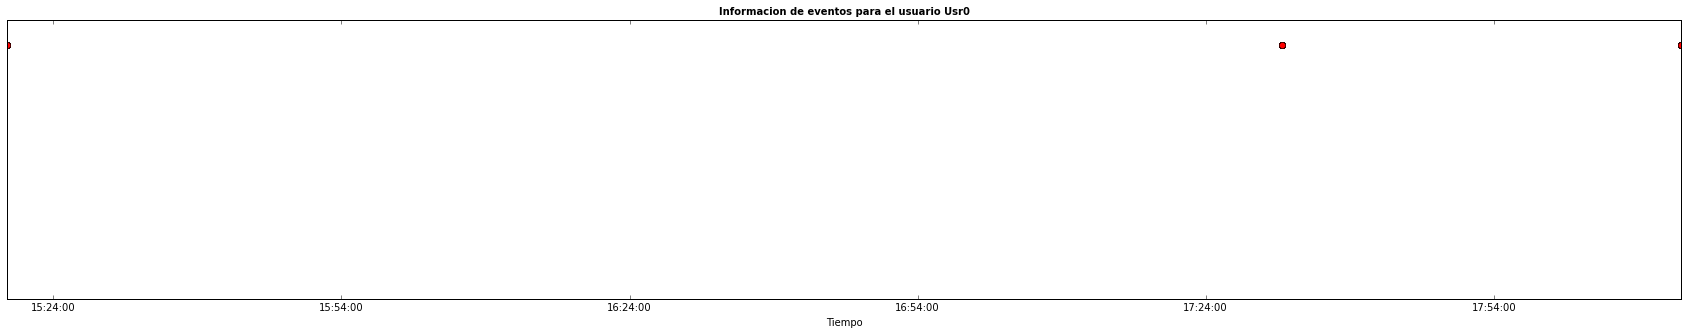

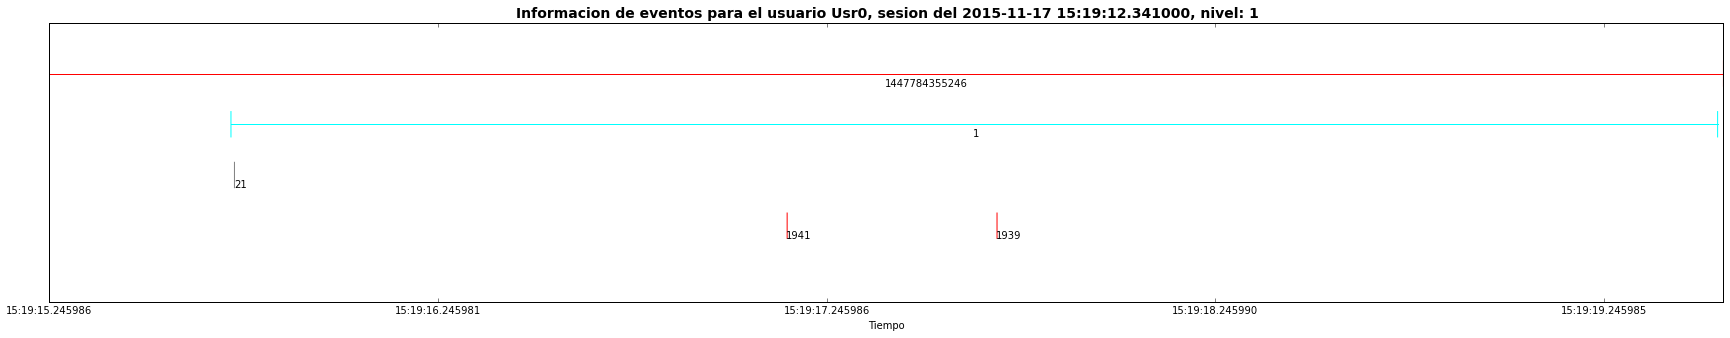

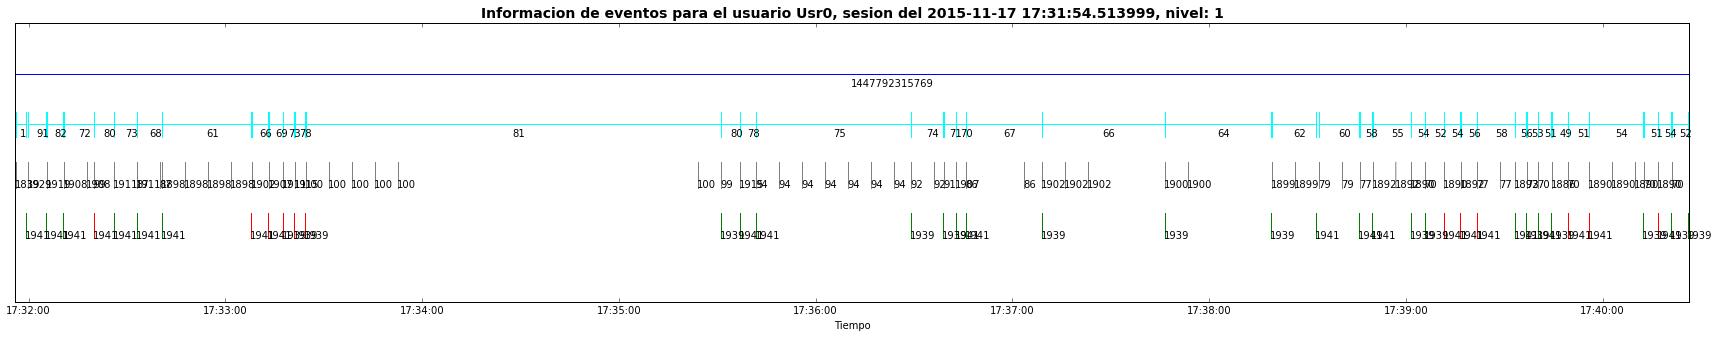

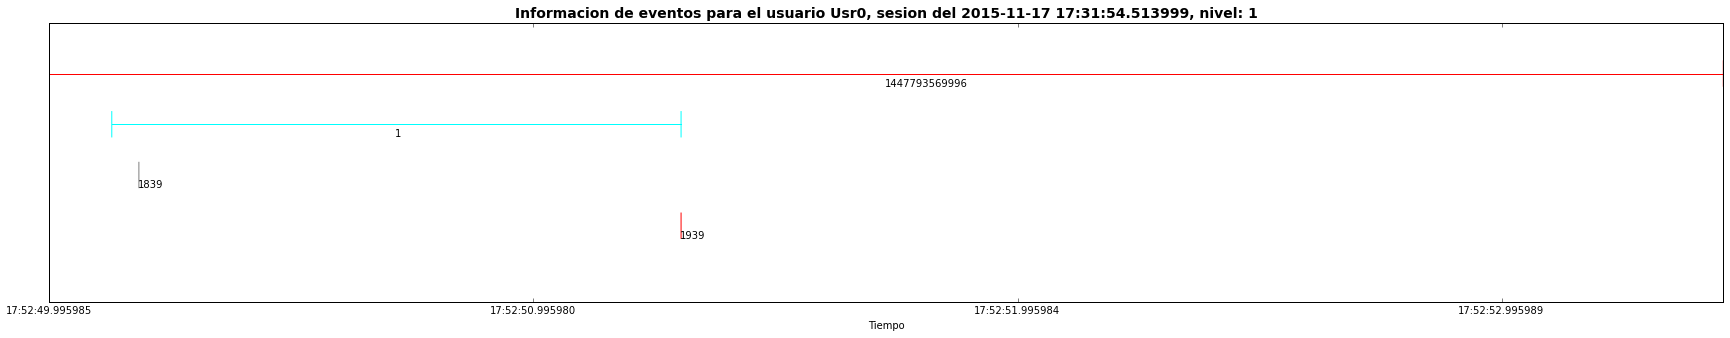

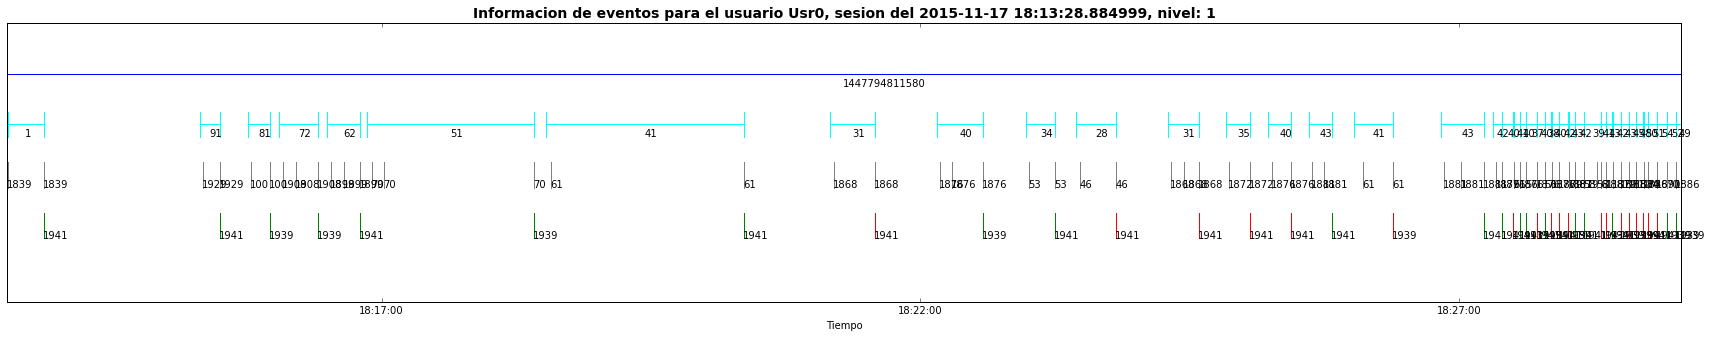

In [6]:
makeTimeline (touchs, sounds)

'Se hara la estadistica del usuario: Usr0'

'El usuario Usr0 jugo 3 veces'

'En la session 2015-11-17 15:19:12.341000 el usuario Usr0 jugo 1 niveles'

'En la session 2015-11-17 17:31:54.513999 el usuario Usr0 jugo 2 niveles'

'En la session 2015-11-17 18:13:28.884999 el usuario Usr0 jugo 1 niveles'

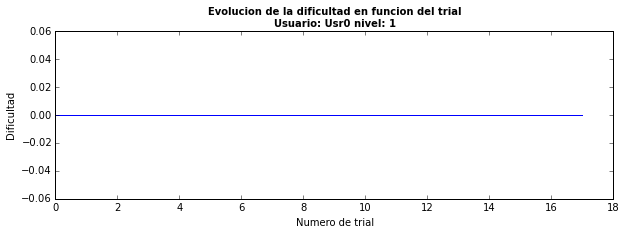

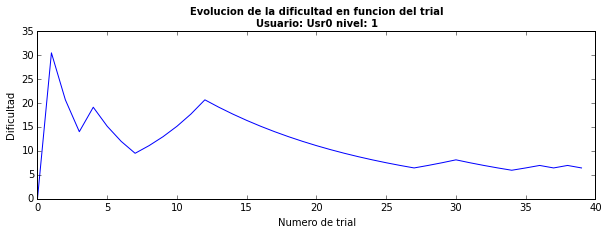

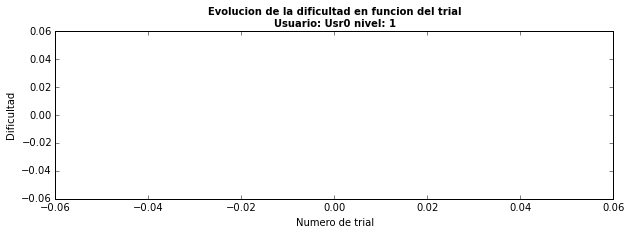

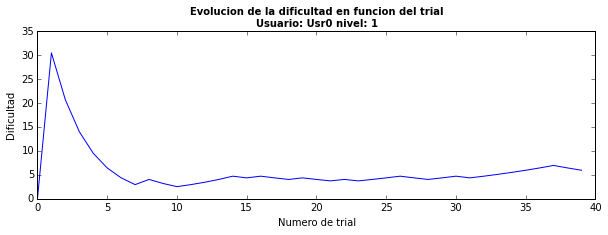

In [25]:
plotConvergencia (touchs)

In [26]:
def plotConvergencia (touchs):
    
    import matplotlib.pyplot as plt
    import pandas as pd
    
    from Scripts import fechaLocal
    
    
    for usuario in touchs['Alias'].unique():
        display ('Se hara la estadistica del usuario: '+usuario)
        touchsUsuario = touchs[touchs['Alias']==usuario]
        display ('El usuario '+usuario+' jugo '+str(len(touchsUsuario['sessionInstance'].unique()))+' veces')
        for session in touchsUsuario['sessionInstance'].unique():
            touchsSession = touchsUsuario[touchsUsuario['sessionInstance']==session]

            # Analizamos los datos para dificultad generica
            display ('En la session '+ str(fechaLocal(session))+ ' el usuario '+str(usuario)+' jugo '+str(len(touchsSession['levelInstance'].unique())) + ' niveles')
            for level in touchsSession['levelInstance'].unique():

                touchsLevel = touchsSession[touchsSession['levelInstance']==level]
                levelInfo = touchsLevel.iloc[0]
                

                # Extraemos la info de del delta tita del estimulo de cada trial
                temp = pd.DataFrame(columns=['DeltaTita'])
                for (i,r) in touchsLevel.iterrows():
                    e = r['jsonMetaDataRta']
                    temp.loc[i] = [e['infoConceptual']['deltaAngulo']]
                touchsLevel = pd.concat([touchsLevel, temp], axis=1)
                
                # Armamos el grafico
                fig = plt.figure(figsize=(10,3))
                ax = fig.add_subplot(111)
                title = 'Evolucion de la dificultad en funcion del trial \n' + 'Usuario: '+str(usuario) + ' nivel: ' + str(levelInfo['levelId'])
                ax.set_title(title, fontsize=10, fontweight='bold')
                ax.set_xlabel('Numero de trial')
                ax.set_ylabel('Delta Tita (grados)')
                x = range(len(touchsLevel))
                y = touchsLevel['DeltaTita'].tolist()
                ax.plot(x,y)


In [10]:
touchs['jsonMetaDataTouched'].iloc[0]

{'categories': ['Lineax2', 'NoParalelas'],
 'comments': "Imagen generada por secuencia automatica 'recursosParalelismoAnalisisUmbral'.",
 'idVinculo': 'R0D50+',
 'infoConceptual': {'DescripcionDeParametros': 'AnguloReferencia: direccion media entre las dos rectas; deltaAngulo: diferencia entre los angulos de ambas rectas, siempre en modulo; deltaAnguloLinealizado: el mismo parametro pero transformado de manera que una escala linea tenga mas densidad en angulos chicos; seJuntan: diferencia si las rectas se van juntando en la direccion de referencia o se van separando; separacion: deparacion en el punto medio',
  'deltaAngulo': 44.999992,
  'deltaAnguloLinealizado': 50,
  'direccionAnguloReferencia': 0,
  'seJuntan': False,
  'separacion': 25},
 'infoLineas': [{'Xcenter': 50,
   'Ycenter': 37.5,
   'angulo': -22.499996,
   'largo': 80},
  {'Xcenter': 50, 'Ycenter': 62.5, 'angulo': 22.499996, 'largo': 80}],
 'name': 'Imagen de rectas no paralelas generada automaticamente',
 'nivelDificult